LOGAPRIYA S
235229113

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('fuel_data.csv')
df

,drivenKM,fuelAmount
0,390.00,3600.0
1,403.00,3705.0
2,396.50,3471.0
3,383.50,3250.5
4,321.10,3263.7
5,391.30,3445.2
6,386.10,3679.0
7,371.80,3744.5
8,404.30,3809.0
9,392.20,3905.0


In [5]:
df.head()

,drivenKM,fuelAmount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [6]:
df.shape

(19, 2)

In [7]:
df.columns

Index(['drivenKM', 'fuelAmount'], dtype='object')

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivenKM    19 non-null     float64
 1   fuelAmount  19 non-null     float64
dtypes: float64(2)
memory usage: 436.0 bytes


In [10]:
df.isnull()

,drivenKM,fuelAmount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


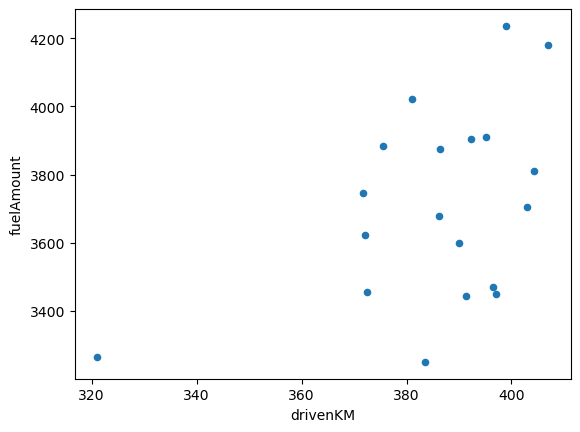

In [11]:
import matplotlib.pyplot as plt
df.plot(kind="scatter",x="drivenKM",y="fuelAmount")
plt.show()

In [12]:
X = df[["drivenKM"]]
y = df.fuelAmount

In [13]:
print(X)
type(X)

    drivenKM
0     390.00
1     403.00
2     396.50
3     383.50
4     321.10
5     391.30
6     386.10
7     371.80
8     404.30
9     392.20
10    386.43
11    395.20
12    381.00
13    372.00
14    397.00
15    407.00
16    372.40
17    375.60
18    399.00


pandas.core.frame.DataFrame

In [14]:
print(y)
type(y)

0     3600.0
1     3705.0
2     3471.0
3     3250.5
4     3263.7
5     3445.2
6     3679.0
7     3744.5
8     3809.0
9     3905.0
10    3874.0
11    3910.0
12    4020.7
13    3622.0
14    3450.5
15    4179.0
16    3454.2
17    3883.8
18    4235.9
Name: fuelAmount, dtype: float64


pandas.core.series.Series

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(15, 1)

In [18]:
X_test.shape

(4, 1)

In [19]:
y_train.shape

(15,)

In [20]:
y_test.shape

(4,)

In [21]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
pred_800_KM=reg.predict([[800]])
print("Deisel price for 800KM:",pred_800_KM)

Deisel price for 800KM: [6905.64571567]


C:\Users\slogp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
y_pred=reg.predict(X_test)
y_pred

array([3775.81615646, 3785.74000628, 3815.51155575, 3875.05465468])

In [24]:
import sklearn.metrics as metrics
MSE=metrics.mean_squared_error(y_test,y_pred)
R2=metrics.r2_score(y_test,y_pred)
print("MSE: ",MSE)
print("R2: ",R2)
print("Values of Model parameters:")
print("coefficient:",reg.coef_)
print("Intercept:",reg.intercept_)

MSE:  46181.36710639155
R2:  -0.6180990161577022
Values of Model parameters:
coefficient: [7.63373063]
Intercept: 798.6612098962887


In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
std_X_train=ss.fit_transform(X_train)
std_X_train

array([[ 1.0601947 ],
       [-0.5322439 ],
       [ 0.02186483],
       [-0.55221178],
       [ 1.19497791],
       [-0.37250084],
       [ 0.670821  ],
       [ 0.45616627],
       [ 0.79562026],
       [-3.09312478],
       [-0.10293443],
       [-0.56219572],
       [ 0.16812957],
       [ 0.69578085],
       [ 0.15165606]])

In [26]:
std_X_test=ss.transform(X_test)
std_X_test

array([[0.34634292],
       [0.41123853],
       [0.60592538],
       [0.99529908]])

In [27]:
reg.fit(std_X_train,y_train)

LinearRegression()

In [28]:
std_y_pred=reg.predict(std_X_test)
std_y_pred

array([3775.81615646, 3785.74000628, 3815.51155575, 3875.05465468])

In [29]:
std_MSE=metrics.mean_squared_error(y_test,std_y_pred)
std_R2=metrics.r2_score(y_test,std_y_pred)
print("Mean Squared Error: ",std_MSE)
print("R2 Error: ",std_R2)

Mean Squared Error:  46181.36710639172
R2 Error:  -0.6180990161577082


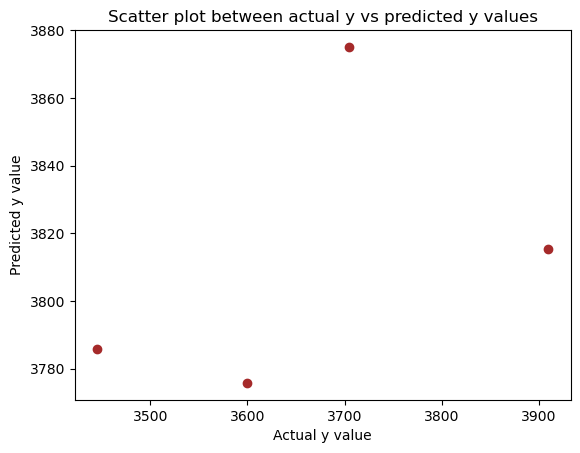

In [30]:
plt.scatter(y_test,y_pred,color='Brown',marker='o')
plt.title("Scatter plot between actual y vs predicted y values")
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')
plt.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
MinMax_X_train=mm.fit_transform(X_train)
MinMax_X_test=mm.transform(X_test)

reg.fit(MinMax_X_train,y_train)
MinMax_y_pred=reg.predict(MinMax_X_test)
print("Predictions of MinMaxScaler:",MinMax_y_pred)

MinMax_MSE=metrics.mean_squared_error(y_test,MinMax_y_pred)
MinMax_R2=metrics.r2_score(y_test,MinMax_y_pred)
print("MinMaxScaler MSE: ",MinMax_MSE)
print("MinMaxScaler R2: ",MinMax_R2)

Predictions of MinMaxScaler: [3775.81615646 3785.74000628 3815.51155575 3875.05465468]
MinMaxScaler MSE:  46181.3671063917
MinMaxScaler R2:  -0.6180990161577073


In [32]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
knr_y_pred=knr.predict(X_test)
print("Predictions of KNeighborsRegressor:",knr_y_pred)
knr_mse=metrics.mean_squared_error(y_test,knr_y_pred)
knr_r2=metrics.r2_score(y_test,knr_y_pred)
print("KNR MSE: ",knr_mse)
print("KNR R2: ",knr_r2)

Predictions of KNeighborsRegressor: [3635.9  3675.9  3787.28 3829.08]
KNR MSE:  21241.836200000045
KNR R2:  0.2557302563733307


In [33]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train, y_train)
sgd_y_pred=sgd.predict(X_test)
print("Predictions of SGDRegressor:",sgd_y_pred)
sgd_mse=metrics.mean_squared_error(y_test, sgd_y_pred)
sgd_r2=metrics.r2_score(y_test,sgd_y_pred)
print("SGD MSE:",sgd_mse)
print("SGD R2:",sgd_r2)

Predictions of SGDRegressor: [-2.43550730e+13 -2.44362545e+13 -2.46797988e+13 -2.51668875e+13]
SGD MSE: 6.081912030755772e+26
SGD R2: -2.1309754322889208e+22


In [34]:
data_mse = {'lr_mse':[46181.36710639155],'std_mse':[46181.36710639172],'minmax_mse':[46181.3671063917],'knr_mse':[21241.836200000045],'sgd_mse':[3.545719075096305e+28]}

def best_model(data_mse):
# Calculating the lowest MSE
    mse_min = min(data_mse.values())
# Storing the lowest MSE in result
    result = [key for key in data_mse if data_mse[key] == mse_min]
    Model_name = []
    if result == ['lr_mse']:
        a = 'LinearRegression'
        Model_name.append(a)
    elif result == ['std_mse']:
        b = 'StandardScaler'
        Model_name.append(b)
    elif result == ['minmax_mse']:
        c = 'MinMaxScaler'
        Model_name.append(c)
    elif result == ['knr_mse']:
        d = 'KNeighborsRegressor'
        Model_name.append(d)
    elif result == ['sgd_mse']:
        e = 'SGDRegressor'
        Model_name.append(e)
# Printing the result
    print("The best model with the lowest MSE to be selected is", Model_name)

best_model(data_mse)

The best model with the lowest MSE to be selected is ['KNeighborsRegressor']
